## Plots of SST for S-MODE region


In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cftime

import cartopy.crs as ccrs                   # import projections
import cartopy
import gsw

# For great circle distance between two points, use gsw.geostrophy.distance(lon, lat, p=0, axis=-1)


In [31]:
%matplotlib inline
# %matplotlib qt5
plt.rcParams['figure.figsize'] = (5,4)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 400
plt.close('all')

__figdir__ = '../plots/' + 'SMODE_'
savefig_args = {'bbox_inches':'tight', 'pad_inches':0.2}
plotfiletype='png'

In [26]:
savefig = True
zoom = True
if zoom:
    xmin, xmax = (-126,-121)
    ymin, ymax = (36.25,38.5)
    levels = np.linspace(14,17,11)-2
else:
    xmin, xmax = (-127,-121)
    ymin, ymax = (35, 40)
    levels = np.linspace(13,18,11)

    

In [27]:
def plot_ops_area(ax,**kwargs):
    """ Add polygon to show S-MODE pilot operations area
         Inputs
            - matplotlib.pyplot.plot kwargs

         return
            - exit code (True if OK)

    """

    # Add S-MODE pilot operations area
    ''' 

    New corners of pentagon:
    38° 05.500’ N, 125° 22.067’ W
    37° 43.000’ N, 124° 00.067’ W
    37° 45.000’ N, 123° 26.000‘ W
    36° 58.000’ N, 122° 57.000’ W
    36° 20.000’ N, 124° 19.067’ W 
    '''
    
    coord = [[-(125+22.067/60),38+5.5/60], [-(124+0.067/60),37+43/60], [-(123+26/60),37+45/60], [-(122+57/60),36+58/60], [-(124+19.067/60),36+20/60]]
    coord.append(coord[0]) #repeat the first point to create a 'closed loop'

    xs, ys = zip(*coord) #create lists of x and y values

    if ax is None:
        ax = plt.gca()    
    # ax.plot(xs,ys,transform=ccrs.PlateCarree()) 
    ax.plot(xs,ys,**kwargs) 
    
    SF_lon=-(122+25/60)
    SF_lat= 37+47/60
    
    # mark a known place to help us geo-locate ourselves
    ax.plot(SF_lon, SF_lat, 'o', markersize=3, **kwargs)
    ax.text(SF_lon-5/60, SF_lat+5/60, 'San Francisco', fontsize=8, **kwargs)
    ax.text(np.mean(xs)-.6, np.mean(ys)-.3, 'S-MODE ops area', fontsize=8, **kwargs)
    print(kwargs)
    
    return(xs,ys,ax)


In [28]:
#url = 'http://smode.whoi.edu:8080/thredds/dodsC/satellite/AVHRR_METOPB/AVHRR_METOPB_20210930T060000Z.nc'
#url = 'http://smode.whoi.edu:8080/thredds/dodsC/satellite/MODIS_Terra/MODIS_Terra_20210930T065001Z.nc'3 
# url = 'http://smode.whoi.edu:8080/thredds/dodsC/satellite/VIIRS_NRT/VIIRS_NRT_20210929T213000Z.nc'  #This one is good
url = 'http://smode.whoi.edu:8080/thredds/dodsC/satellite/VIIRS_NRT/VIIRS_NRT_20211016T095000Z.nc'
#url = 'http://smode.whoi.edu:8080/thredds/dodsC/satellite/MODIS_Terra/MODIS_Terra_20211011T233459Z.nc'
# http://smode.whoi.edu:8080/thredds/dodsC/satellite/VIIRS_NRT/VIIRS_NRT_20210929T213000Z.nc
ds = xr.open_dataset(url)


In [29]:
ds

<xarray.Dataset>
Dimensions:                  (ni: 1086, nj: 917, time: 1)
Coordinates:
  * time                     (time) object 2021-10-16 09:50:01
    lat                      (nj, ni) float32 ...
    lon                      (nj, ni) float32 ...
Dimensions without coordinates: ni, nj
Data variables:
    sea_surface_temperature  (time, nj, ni) float32 ...
    quality_level            (time, nj, ni) float32 ...
Attributes:
    geospatial_bounds:                        POLYGON((-141.586   6.984, -136...
    geospatial_first_scanline_first_fov_lat:  41.460983
    geospatial_first_scanline_first_fov_lon:  -136.9372
    geospatial_first_scanline_last_fov_lat:   36.0896
    geospatial_first_scanline_last_fov_lon:   -101.94332
    geospatial_last_scanline_first_fov_lat:   6.984363
    geospatial_last_scanline_first_fov_lon:   -141.58636
    geospatial_last_scanline_last_fov_lat:    2.752913
    geospatial_last_scanline_last_fov_lon:    -114.28099
    Conventions:                              CF-1.6, ACDD-1.3
    Metadata_Conventions:                     Unidata Dataset Discovery v1.0
    acknowledgement:                          Please acknowledge the use of t...
    cdm_data_type:                            swath
    comment:                                  none
    creator_email:                            Alex.Ignatov@noaa.gov
    creator_name:                             Alex Ignatov
    creator_url:                              http://www.star.nesdis.noaa.gov
    date_created:                             20211016T120256Z
    destripe:                                 yes (M5:1.0:f M7:1.0:f M10:1.0:...
    easternmost_longitude:                    -101.94332
    file_quality_level:                       3
    gds_version_id:                           02.0
    geospatial_lat_resolution:                0.0067
    geospatial_lat_units:                     degrees_north
    geospatial_lon_resolution:                0.0067
    geospatial_lon_units:                     degrees_east
    history:                                  Created by Advanced Clear-Sky P...
    id:                                       VIIRS_NPP-OSPO-L2P-v2.61
    institution:                              NOAA/NESDIS/OSPO
    keywords:                                 Oceans > Ocean Temperature > Se...
    keywords_vocabulary:                      NASA Global Change Master Direc...
    license:                                  GHRSST protocol describes data ...
    metadata_link:                            http://podaac.jpl.nasa.gov/ws/m...
    naming_authority:                         org.ghrsst
    northernmost_latitude:                    41.46338
    platform:                                 NPP
    processing_level:                         L2P
    product_version:                          2.61
    project:                                  Group for High Resolution Sea S...
    publisher_email:                          ghrsst-po@nceo.ac.uk
    publisher_name:                           The GHRSST Project Office
    publisher_url:                            http://www.ghrsst.org
    references:                               Data convention: GHRSST Data Sp...
    sensor:                                   VIIRS
    aggregator_version:                       V1.00
    preprocessor_version:                     1.14
    sst_luts:                                 LUT_VIIRS_NPP_L2P_DEPTH_DAY_V01...
    source:                                   VIIRS-MOD-GEO-TC,VIIRS-M5-SDR,V...
    southernmost_latitude:                    2.752913
    spatial_resolution:                       742 m at nadir
    standard_name_vocabulary:                 CF Standard Name Table (v26, 08...
    start_time:                               20211016T095000Z
    stop_time:                                20211016T095958Z
    summary:                                  Sea surface temperature retriev...
    time_coverage_end:                        20211016T095958Z
    time_coverage_start:         

C:\Users\jtomf\anaconda3\envs\base2\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


{'transform': <cartopy.crs.PlateCarree object at 0x000002535A4B93B0>, 'color': 'w'}


C:\Users\jtomf\anaconda3\envs\base2\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


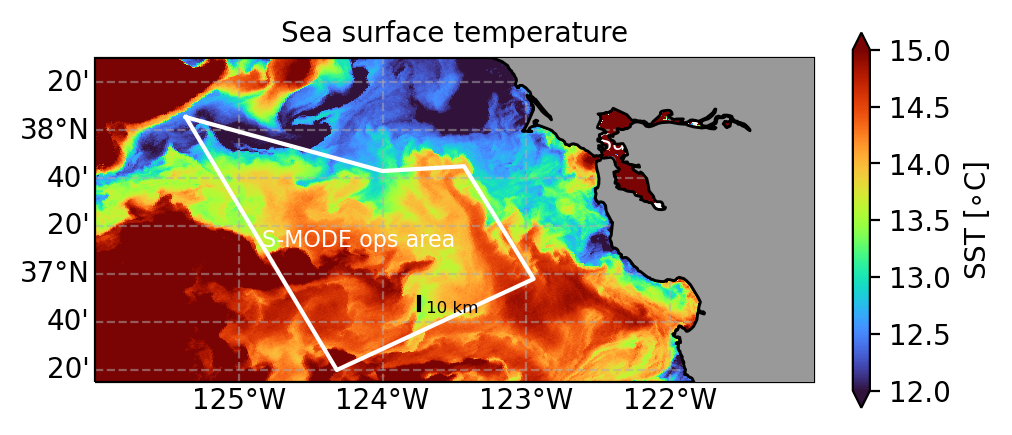

In [45]:
fig = plt.figure()
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
extent = [xmin, xmax, ymin, ymax]
ax.set_extent(extent, crs=ccrs.PlateCarree())
ax.set_title('Sea surface temperature',size = 10.)

#plt.set_cmap(cmap=plt.get_cmap('nipy_spectral'))
plt.set_cmap(cmap=plt.get_cmap('turbo'))
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.ylabels_right = False
#gl.xlocator = matplotlib.ticker.MaxNLocator(10)
#gl.xlocator = matplotlib.ticker.AutoLocator
# gl.xlocator = matplotlib.ticker.FixedLocator(np.arange(0, 360 ,30))

ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')
# cs = ax.contourf(ds.lon,ds.lat,np.squeeze(ds.sea_surface_temperature)-273.15, levels, extend='both', transform=ccrs.PlateCarree())
cs = ax.pcolormesh(ds.lon,ds.lat,np.squeeze(ds.sea_surface_temperature)-273.15, vmin=levels[0], vmax=levels[-1], transform=ccrs.PlateCarree())
# cb = plt.colorbar(cs,ax=ax,shrink=.8,pad=.05)
cb = plt.colorbar(cs,fraction = 0.022,extend='both')
cb.set_label('SST [$\circ$C]',fontsize = 10)
plot_ops_area(ax,transform=ccrs.PlateCarree(),color='w')

# Add a 10 km scale bar
km_per_deg_lat=gsw.geostrophy.distance((125,125), (37,38))/1000
deg_lat_equal_10km=10/km_per_deg_lat
x0 = -123.75
y0 = 36.75
ax.plot(x0+np.asarray([0, 0]),y0+np.asarray([0.,deg_lat_equal_10km]),transform=ccrs.PlateCarree(),color='k')
ax.text(x0+3/60, y0-1/60, '10 km', fontsize=6,transform=ccrs.PlateCarree())

if savefig:
    plt.savefig(__figdir__+'_SST'+plotfiletype,**savefig_args)


In [8]:
ax.axes.get_extent()

(34.00000000000002, 39.000000000000014, 36.25, 38.5)